# About the Dataset

This dataset consisits of 64x64 images captured by Sentinel-2A satellite and it has over 27000 images spread across 10 classes. The data consists of hyperspectral images with 13 spectral bands. 

The dataset is omposed of images taken from the Sentinel-2 satellite. It lists images of the earth's surface into 10 different land cover labels. 

In [1]:
# Importing libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import rasterio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = "./tif"
labels = os.listdir(dataset)
labels

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

These are the 10 classes of land cover in the dataset

# Data Exploration

### Plotting class distributions of dataset

Text(0.5, 1.0, 'EUROSAT Class Distribution')

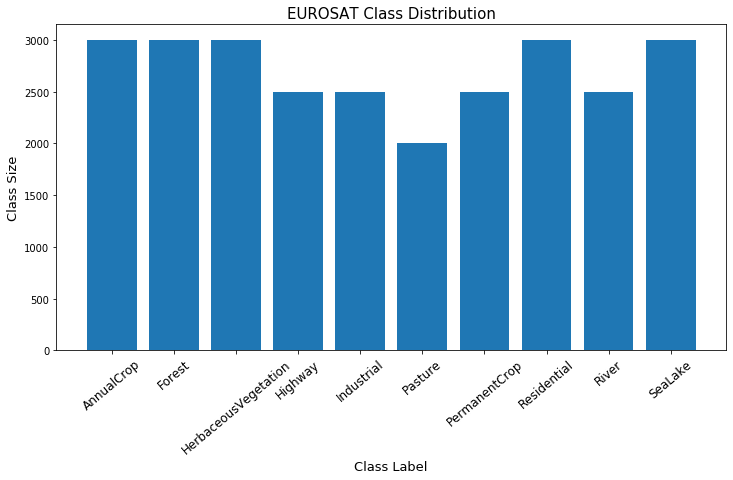

In [3]:
counts = {}

for l in labels:
    counts[l] = len(os.listdir(os.path.join(dataset, l)))

plt.figure(figsize=(12,6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('Class Label', fontsize=13)
plt.ylabel('Class Size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)

Each class varifies in size. Hence, we will have to stratify later on

## Preview of Different Classes

In [22]:
# Importing Images
# img_paths = [os.path.join(dataset, l, l+'_1000.tif') for l in labels]
img_paths = []

img_paths = img_paths + [os.path.join(dataset, l, l+'_2000.tif') for l in labels]


#### Calculating the dimensions of the image on earth in metres

In [23]:
for img in img_paths:
    sat_data = rasterio.open(img)
    width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
    height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom
    print(img.split('\\')[-2], "\nWidth : ", width_in_projected_units, "Height : ", height_in_projected_units)

AnnualCrop 
Width :  640.178719083895 Height :  640.2759043509141
Forest 
Width :  639.931708357064 Height :  639.8996918257326
HerbaceousVegetation 
Width :  640.1186183239333 Height :  639.6750785252079
Highway 
Width :  642.439800421067 Height :  638.7684292686172
Industrial 
Width :  637.2012490322813 Height :  639.8486484214664
Pasture 
Width :  638.5759798452491 Height :  639.6489530131221
PermanentCrop 
Width :  639.5867255999474 Height :  641.1948298038915
Residential 
Width :  641.5660224460298 Height :  639.5868128668517
River 
Width :  639.8023213049164 Height :  640.2042276095599
SeaLake 
Width :  639.8546920991503 Height :  639.8149254219607


#### Rows & Columns

In [24]:
for img in img_paths:
    sat_data = rasterio.open(img)
    print(img.split('\\')[-2])
    print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

AnnualCrop
Rows: 64, Columns: 64
Forest
Rows: 64, Columns: 64
HerbaceousVegetation
Rows: 64, Columns: 64
Highway
Rows: 64, Columns: 64
Industrial
Rows: 64, Columns: 64
Pasture
Rows: 64, Columns: 64
PermanentCrop
Rows: 64, Columns: 64
Residential
Rows: 64, Columns: 64
River
Rows: 64, Columns: 64
SeaLake
Rows: 64, Columns: 64


#### Converting the pixel co-ordinates to longitudes and latitudes

In [26]:
for img in img_paths:
    sat_data = rasterio.open(img)
    print(img.split('\\')[-2])
    # Upper left pixel
    row_min = 0
    col_min = 0

    # Lower right pixel.  Rows and columns are zero indexing.
    row_max = sat_data.height - 1
    col_max = sat_data.width - 1

    # Transform coordinates with the dataset's affine transformation.
    topleft = sat_data.transform * (row_min, col_min)
    botright = sat_data.transform * (row_max, col_max)

    print("Top left corner coordinates: {}".format(topleft))
    print("Bottom right corner coordinates: {}\n".format(botright))

AnnualCrop
Top left corner coordinates: (772967.6388936953, 5217495.586391792)
Bottom right corner coordinates: (773597.8148202935, 5216865.314798446)

Forest
Top left corner coordinates: (576998.316997501, 5614336.0874284245)
Bottom right corner coordinates: (577628.2497729149, 5613706.186169283)

HerbaceousVegetation
Top left corner coordinates: (453874.8038349409, 6139459.5803086115)
Bottom right corner coordinates: (454504.9205998535, 6138829.900153189)

Highway
Top left corner coordinates: (461226.249066, 3100223.32396)
Bottom right corner coordinates: (461858.65074453945, 3099594.536287439)

Industrial
Top left corner coordinates: (566906.655159, 5643228.87607)
Bottom right corner coordinates: (567533.9001385161, 5642599.0250567105)

Pasture
Top left corner coordinates: (577529.8024485304, 5861928.808272096)
Bottom right corner coordinates: (578158.4006786906, 5861299.153833974)

PermanentCrop
Top left corner coordinates: (653386.5139481875, 4869515.055420981)
Bottom right corner

#### Bands

The images that we are inspecting have 13 spectral bands. Each spectral band is stored as a numpy array

In [27]:
for img in img_paths:
    sat_data = rasterio.open(img)
    print(img.split('\\')[-2])
    print(sat_data.count)

    # sequence of band indexes
    print(sat_data.indexes, "\n")


AnnualCrop
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Forest
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

HerbaceousVegetation
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Highway
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Industrial
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Pasture
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

PermanentCrop
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Residential
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

River
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

SeaLake
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 



### Visualizing the Images

We are using matplotlib to visualise the image since it essentially consists of arrays.

#### About the Bands

B1  - Ultra Blue (Coastal and Aerosol) 60m 443nm

B2  - Blue                             10m 490nm

B3  - Green                            10m 560nm

B4  - Red                              10m 665nm

B5  - VNIR                             20m 705nm

B6  - VNIR                             20m 740nm

B7  - VNIR                             20m 783nm

B8  - VNIR                             10m 842nm

B8a - VNIR                             10m 865nm

B9  - SWIR                             60m 940nm

B10 - SWIR                             60m 1375nm

B11 - SWIR                             20m 1610nm

B12 - SWIR                             20m 2190nm

#### Band Combinations
1. Natural Color - B4, B3, B2
2. Color Infrared - B8, B4, B3
3. Short-Wave Infrared - B12, B8A, B4
4. Agriculture - B11, B8, B2
5. Geology - B12, B11, B2
6. Bathymetric - B4, B3, B1
7. Normalized Difference Vegetation Index - (B8-B4)/(B8+B4)
8. Moisture Index (B8A-B11)/(B8A+B11)

**We are going to use Normalised Difference Vegetation Index (NDVI) in classfication.** Hence, we have visualised only the B8 and B4 bands. 

B8 is the *near-infrared (NIR)* band and B4 is the *red* band.

#### Displaying the Red Band

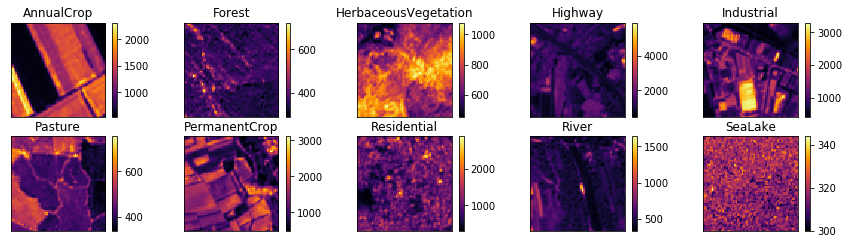

In [48]:
plt.figure(figsize=(15,8))
for i in range(len(img_paths)):
    plt.subplot(4, 5, i+1, xticks=[], yticks=[])
    img = rasterio.open(img_paths[i]).read()[3]
    fig = plt.imshow(img)
    fig.set_cmap('inferno')
    plt.title(img_paths[i].split('\\')[-2])
    plt.colorbar()
# plt.show()

#### Displaying the Near-Infrared Band

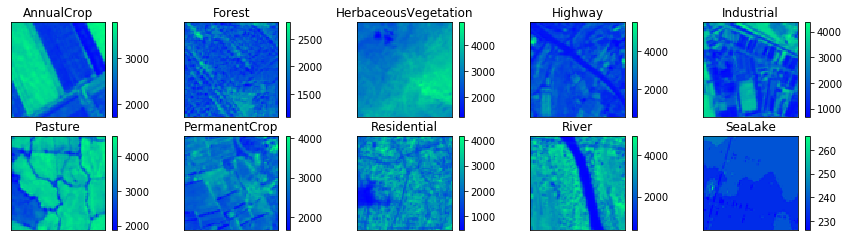

In [54]:
plt.figure(figsize=(15,8))
for i in range(len(img_paths)):
    plt.subplot(4, 5, i+1, xticks=[], yticks=[])
    img = rasterio.open(img_paths[i]).read()[7]
    fig = plt.imshow(img)
    fig.set_cmap('winter')
    plt.title(img_paths[i].split('\\')[-2])
    plt.colorbar()

## Calculating NDVI

NDVI = (NIR - RED)/(NIR + RED)


In [58]:
def cal_ndvi(sat_data):
    r = sat_data.read()[3]
    nir = sat_data.read()[7]
    
    # calculating denominator i.e. NIR + RED
    denom = np.add(nir, r)
    
    # calculating numerator i.e. NIR - RED
    numerator = np.subtract(nir, r)
    
    return np.divide(numerator, denom)

cal_ndvi(rasterio.open(img_paths[0]))

array([[0.71842961, 0.71842961, 0.71778222, ..., 0.74208566, 0.74008914,
        0.74178404],
       [0.71842961, 0.71842961, 0.71778222, ..., 0.74208566, 0.74008914,
        0.74178404],
       [0.71090405, 0.71090405, 0.71355889, ..., 0.74425153, 0.73837072,
        0.73855279],
       ...,
       [0.2197355 , 0.2197355 , 0.19371728, ..., 0.18860179, 0.26210093,
        0.38008014],
       [0.32050633, 0.32050633, 0.18861789, ..., 0.3172043 , 0.45597579,
        0.52941176],
       [0.4420218 , 0.4420218 , 0.21470432, ..., 0.48513709, 0.56197577,
        0.59274924]])

### Visualizing NDVI for different classes

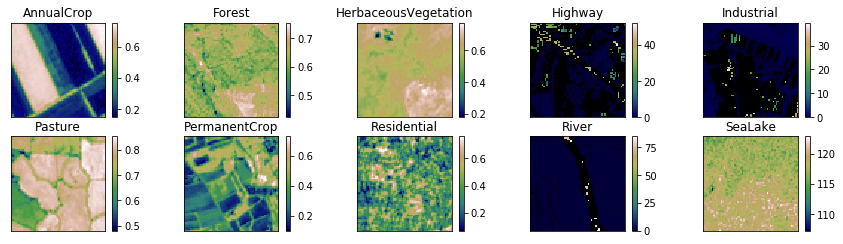

In [66]:
plt.figure(figsize=(15,8))
for i in range(len(img_paths)):
    plt.subplot(4, 5, i+1, xticks=[], yticks=[])
    img = rasterio.open(img_paths[i])
    fig = plt.imshow(cal_ndvi(img))
    fig.set_cmap('gist_earth')
    plt.title(img_paths[i].split('\\')[-2])
    plt.colorbar()

**What the values of NDVI indicate?**
1. <=0.1 : Areas of barren rock, sand or snow i.e. negligible vegetation
2. 0.2 to 0.5 : Sparse Vegetation such as shrubs and grasslands or senescing crops
3. 0.6 to 0.9 : Dense Vegetation (temperate and tropical forests or crops at their peak growth stage)